# ANALYSIS 3 : POINT OF INTEREST AS THE ONE WITH MAXIMUM NUMBER OF REVIEWS ON AMAZON
- Reviewer with maximum number of reviews.
- Distribution of reviews for 'Susan Katz' based on overall rating (reviewer_id : A1RRMZKOMZ2M7J).
- Distribution of reviews over the years for 'Susan Katz'.
- Percentage distribution of negative reviews for 'Susan Katz', since the count of reviews is dropping post year 2009.
- Lexical density distribution over the year for reviews written by 'Susan Katz'.
- Wordcloud of all important words used in 'Susan Katz' reviews on amazon.
- Number of distinct products reviewed by 'Susan Katz' on amazon.
- Products reviewed by 'Susan Katz'.
- Popular sub-category for 'Susan Katz'.
- Price range in which 'Susan Katz' shops.
-------------------

Importing all the required Libraries

In [1]:
# importing all the required Libraries
import glob
import json
import csv
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import calendar
import collections
import warnings
warnings.filterwarnings("ignore")

Creating a path for Review file 'ReviewSample.json'.

In [2]:
# Creating a path for Review file i.e. input Data.
file=glob.glob('../Data/Tested_Data/ReviewSample.json')

Cleaning of 'ReviewSample.json' file and importing the data as pandas DataFrame.

In [3]:
# reading a multiple json files from a single json file 'ReviewSample.json'.
review=[]
with open(file[0]) as data_file:
    data=data_file.read()
    for i in data.split('\n'):
        review.append(i)
        
# Making a list of Tuples containg all the data of json files.
reviewDataframe=[]
for x in review:
    try:
        jdata=json.loads(x)
        reviewDataframe.append((jdata['reviewerID'],jdata['asin'],jdata['reviewerName'],jdata['helpful'][0],jdata['helpful'][1],jdata['reviewText'],jdata['overall'],jdata['summary'],jdata['unixReviewTime'],jdata['reviewTime'])) 
    except:
        pass        
    
# Creating a dataframe using the list of Tuples got in the previous step.    
dataset=pd.DataFrame(reviewDataframe,columns=['Reviewer_ID','Asin','Reviewer_Name','helpful_UpVote','Total_Votes','Review_Text','Rating','Summary','Unix_Review_Time','Review_Time'])    

Grouping on 'Reviewer_ID' and getting the count of reviews.

In [4]:
temp=dataset.groupby('Reviewer_ID')['Asin'].count().reset_index('Count')
temp=temp.rename(columns={'Asin':'No_Of_Reviews'})

Sorting in Descending order of 'No_Of_Reviews'

In [5]:
Point_ofInterest=temp.sort('No_Of_Reviews',ascending=False)

Taking Point_of_Interest DataFrame to .csv file

In [6]:
Point_ofInterest.to_csv('../Analysis/Analysis_3/Most_Reviews.csv')

In [18]:
Point_ofInterest.head()

,Reviewer_ID,No_Of_Reviews
363514,A1RRMZKOMZ2M7J,180
213855,A1GAS9DL6T4ZS8,164
1366642,A5QQRB2QOY96U,161
459388,A1Z4LX3Q1YMF84,158
734329,A2KBV88FL48CFS,154


# DISTRIBUTION OF REVIEWS FOR 'SUSAN KATZ' BASED ON OVERALL RATING (REVIEWER_ID : A1RRMZKOMZ2M7J).

Only taking those review which is posted by 'SUSAN KATZ'.

In [7]:
POI=dataset[dataset.Reviewer_ID == 'A1RRMZKOMZ2M7J']

Function to give positive, negative and neutral status based on Overall Rating.

In [8]:
def ReviewCategory(score):
    if score >= 4:
        return 'pos'
    elif (score <= 2) & (score > 0):
        return 'neg'
    else:
        return 'neu'

Calling function 'ReviewCategory()' for each row of DataFrame.

In [9]:
POI['Category']=POI['Rating'].apply(lambda x: ReviewCategory(x))

Grouping on 'Category' which we got in previous step and getting the count of reviews.

In [12]:
CategoryCount=POI.groupby('Category')['Reviewer_ID'].count().reset_index()
CategoryCount=CategoryCount.rename(columns={'Reviewer_ID':'Count'})

In [13]:
CategoryCount

,Category,Count
0,neg,38
1,neu,51
2,pos,91


Bar Plot for Category V/S Count. 

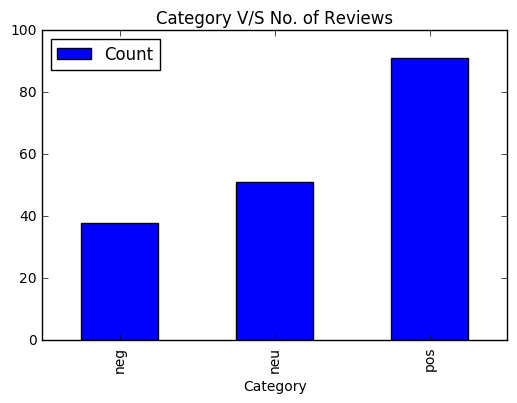

In [15]:
CategoryCount.plot(x="Category",y="Count",kind="bar",title="Category V/S No. of Reviews")
plt.show()

# DISTRIBUTION OF REVIEWS OVER THE YEARS FOR 'SUSAN KATZ'

In [16]:
# Converting the data type of 'Review_Time' column in the Dataframe 'POI' to datetime format.
POI['Review_Time']= pd.to_datetime(POI['Review_Time'])

# Creating an Addtional column as 'Month' in Datatframe 'POI' for Month by taking the month part of 'Review_Time' column.
POI['Month']=POI['Review_Time'].dt.month

# Creating an Addtional column as 'Year' in Datatframe 'POI' for Year by taking the year part of 'Review_Time' column.
POI['Year']=POI['Review_Time'].dt.year

# Creating an Addtional column as 'Day' in Datatframe 'POI' for Year by taking the year part of 'Review_Time' column.
POI['Day']=POI['Review_Time'].dt.day

Grouping on 'Year' which we got in previous step and getting the count of reviews.

In [18]:
YearlyCount=POI.groupby('Year')['Reviewer_ID'].count().reset_index()
YearlyCount=YearlyCount.rename(columns={'Reviewer_ID':'No_Of_Reviews'})

In [21]:
YearlyCount.head()

,Year,No_Of_Reviews
0,2006,1
1,2007,16
2,2008,23
3,2009,52
4,2010,38


In [23]:
# Taking into .csv
YearlyCount.to_csv('../Analysis/Analysis_3/Yearly_Count.csv')

Bar Plot to get trend over the years for Reviews Written by 'SUSAN KATZ'

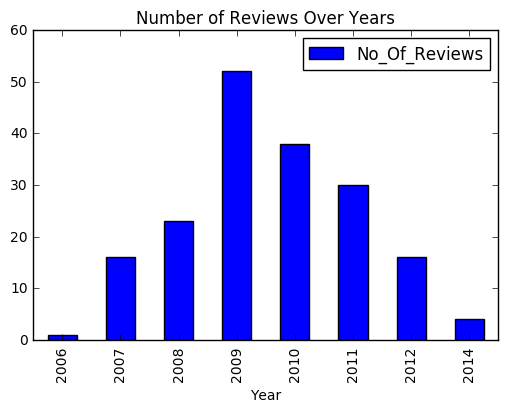

In [26]:
YearlyCount.plot(x="Year",y="No_Of_Reviews",kind="bar",title="Number of Reviews Over Years")
plt.show()

# PERCENTAGE DISTRIBUTION OF NEGATIVE REVIEWS FOR 'SUSAN KATZ', SINCE THE COUNT OF REVIEWS IS DROPPING POST YEAR 2009

Taking the count of negative reviews over the years.

In [27]:
neg=POI[POI.Category == 'neg']
neg_Year=neg.groupby('Year')['Reviewer_ID'].count().reset_index()
neg_Year=neg_Year.rename(columns={'Reviewer_ID':'No_Of_Neg_Reviews'})

Negative reviews over the year by 'SUSAN KATZ'

In [28]:
neg_Year

,Year,No_Of_Neg_Reviews
0,2006,1
1,2008,4
2,2009,11
3,2010,6
4,2011,10
5,2012,4
6,2014,2


Merging 2 Dataframe for mapping and then calculating the Percentage of Negative reviews for each year.

In [29]:
neg_Percentage=pd.merge(neg_Year,YearlyCount,on='Year',how='inner')
neg_Percentage['Percentage']=(neg_Percentage['No_Of_Neg_Reviews']/neg_Percentage['No_Of_Reviews'])*100

In [30]:
neg_Percentage

,Year,No_Of_Neg_Reviews,No_Of_Reviews,Percentage
0,2006,1,1,100.000000
1,2008,4,23,17.391304
2,2009,11,52,21.153846
3,2010,6,38,15.789474
4,2011,10,30,33.333333
5,2012,4,16,25.000000
6,2014,2,4,50.000000


In [31]:
neg_Percentage.to_csv('../Analysis/Analysis_3/Negative_Review_Percentage.csv')

Bar Plot for Year V/S Negative Reviews Percentage

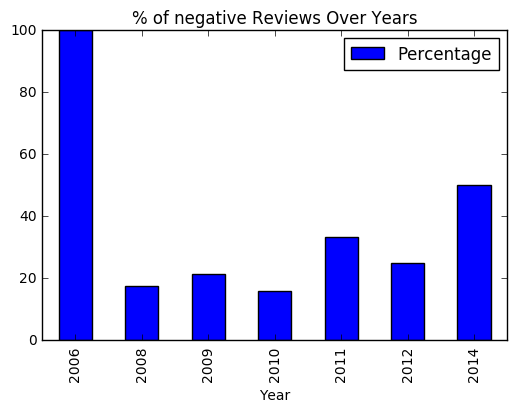

In [36]:
neg_Percentage.plot(x="Year",y="Percentage",kind="bar",title="% of negative Reviews Over Years")
plt.show()

# LEXICAL DENSITY DISTRIBUTION OVER THE YEAR FOR REVIEWS WRITTEN BY 'SUSAN KATZ'

#### Lexical words include:
- verbs (e.g. run, walk, sit)
- nouns (e.g. dog, Susan, oil)
- adjectives (e.g. red, happy, cold)
- adverbs (e.g. very, carefully, yesterday)

Function calculates Lexical Density of a content. Steps involved are as follows:-
- Step 1 :- Converting the content into Lowercase.
- Step 2 :- Using nltk.tokenize to get words from the content.
- Step 3 :- Storing the total word count.
- Step 4 :- Using string.punctuation to get rid of punctuations.
- Step 5 :- Using stopwords from nltk.corpus to get rid of stopwords.
- Step 6 :- tagging of Words and taking count of words which has tags starting from ("NN","JJ","VB","RB") which represents Nouns, Adjectives, Verbs and Adverbs respectively, will be the lexical count.
- Step 7 :- Finally; (lexical count/total count)*100.

In [37]:
def LexicalDensity(text):
    text=text.lower()
    tokens = nltk.word_tokenize(text)
    wordCount=len(tokens)
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = nltk.pos_tag(tokens)
    count=0
    for x in tokens:
        if x[1].startswith(("NN","JJ","VB","RB")):
            count=count+1
    return (count/wordCount)*100

- Calling Function 'LexicalDensity()' for each row of DataFrame.
- Grouping on 'Year' and getting the average Lexical Density of reviews.

In [38]:
POI['LexicalDensity']=POI['Review_Text'].apply(lambda x: LexicalDensity(x))

In [39]:
Avg_LexicalDensity_Yearly=POI.groupby('Year')['LexicalDensity'].mean().reset_index()

In [41]:
Avg_LexicalDensity_Yearly.head()

,Year,LexicalDensity
0,2006,37.837838
1,2007,36.846626
2,2008,36.799353
3,2009,40.428327
4,2010,40.116877


In [42]:
Avg_LexicalDensity_Yearly.to_csv('../Analysis/Analysis_3/Lexical_Density.csv')

Bar Plot for Year V/S Lexical Density

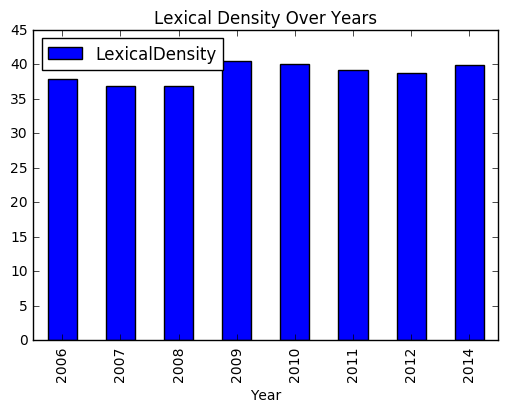

In [43]:
Avg_LexicalDensity_Yearly.plot(x="Year",y="LexicalDensity",kind="bar",title="Lexical Density Over Years")
plt.show()

# WORDCLOUD OF ALL IMPORTANT WORDS USED IN 'SUSAN KATZ' REVIEWS ON AMAZON

To Generate a word corpus following steps are performed inside the function 'create_Word_Corpus(df)'
- Step 1 :- Iterating over the 'summary' section of reviews such that we only get important content of a review.
- Step 2 :- Converting the content into Lowercase.
- Step 3 :- Using nltk.tokenize to get words from the content.
- Step 4 :- Using string.punctuation to get rid of punctuations.
- Step 5 :- Using stopwords from nltk.corpus to get rid of stopwords.
- Step 6 :- tagging of Words using nltk and only allowing words with tag as ("NN","JJ","VB","RB").
- Step 7 :- Finally forming a word corpus and returning the word corpus.

In [44]:
# To Generate a word corpus 
def create_Word_Corpus(df):
    words_corpus = ''
    for val in df["Review_Text"]:
        text = val.lower()
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = nltk.pos_tag(tokens)
        finalwords=[]
        for x in tokens:
            if x[1].startswith(("NN","JJ","VB","RB")):
                finalwords.append(x[0])
        for words in finalwords:
            words_corpus = words_corpus + words + ' '
    return words_corpus

# Plot a cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='k', bbox_inches='tight')

Generate a WordCloud image

In [45]:
# Generate a word cloud image
Susan_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(POI))

Generating a WordCloud of all important words used in Reviews.

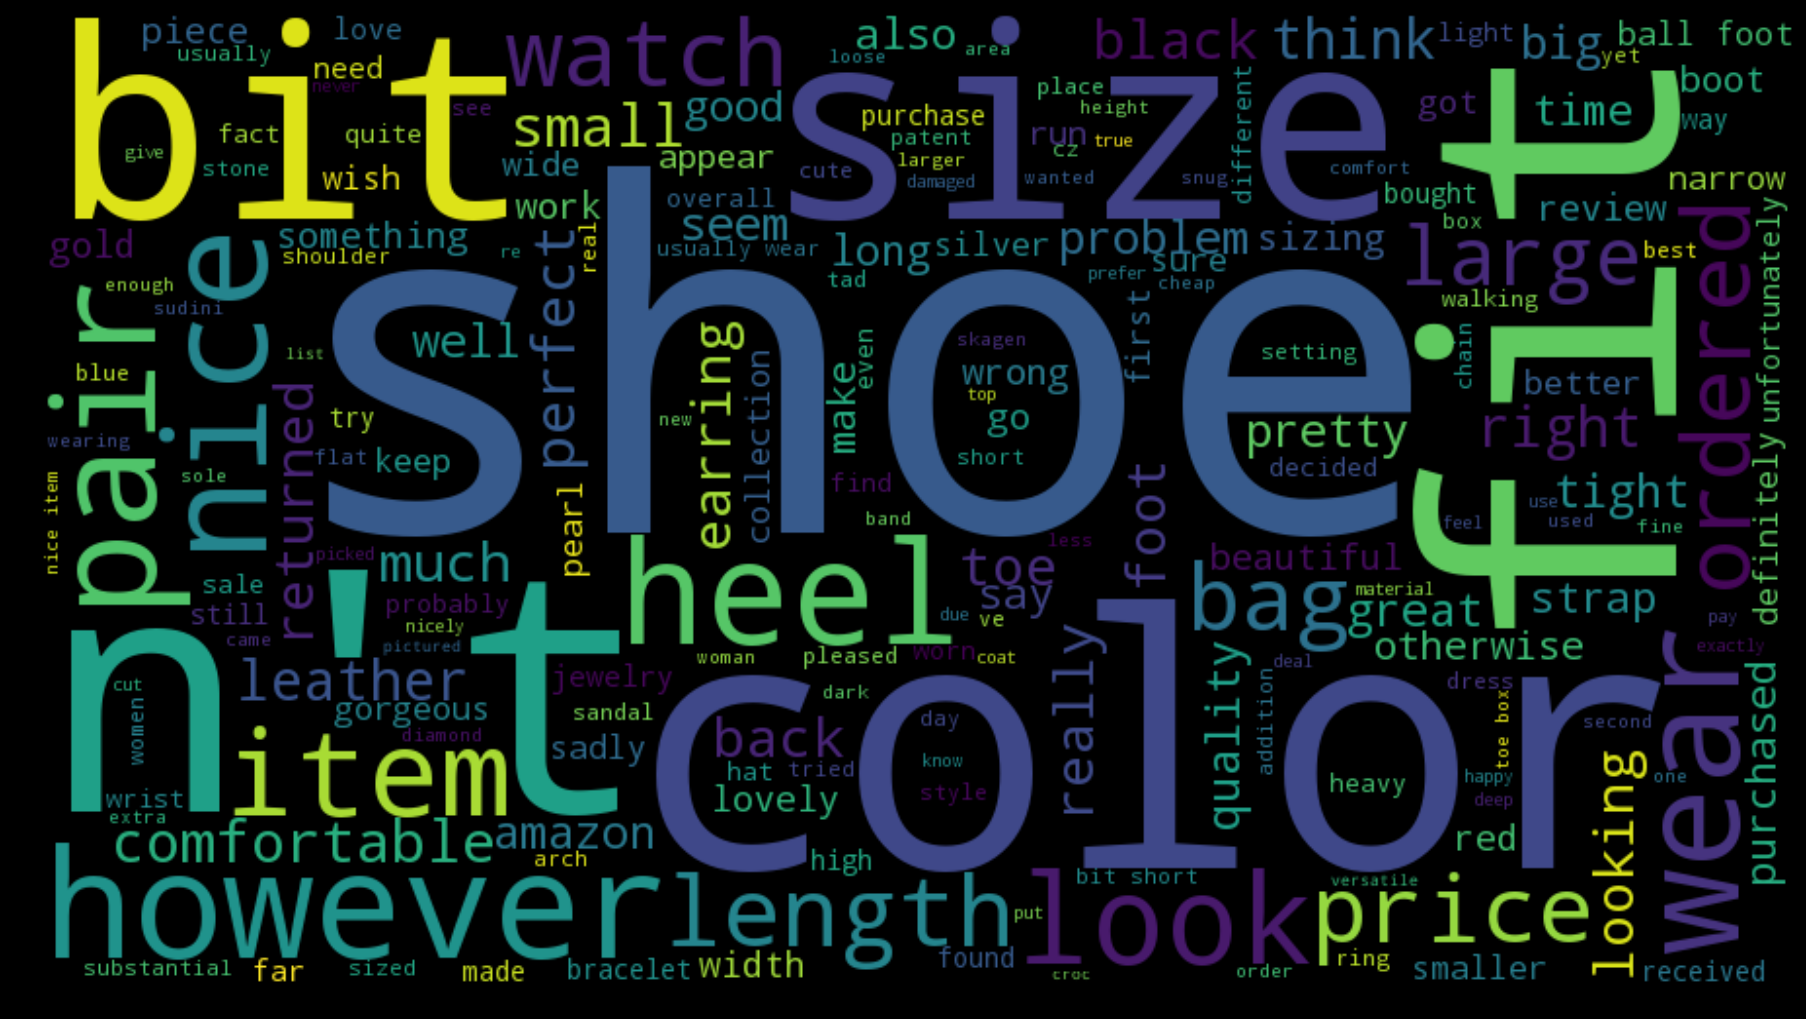

In [46]:
plot_Cloud(Susan_wordcloud)

# NUMBER OF DISTINCT PRODUCTS REVIEWED BY 'SUSAN KATZ' ON AMAZON

In [47]:
len(POI['Asin'].unique())

180

- Always reviewed different product

# PRODUCTS REVIEWED BY 'SUSAN KATZ'.

In [48]:
# Creating a path for Review file i.e. input Data.
file2=glob.glob('../Data/Tested_Data/ProductSample.json')

Cleaning and import the data into the dataframe.

In [49]:
# reading a multiple json files from a single json file 'ProductSample.json'.
product=[]
with open(file2[0]) as data_file:
    data=data_file.read()
    for i in data.split('\n'):
        product.append(i)
        
# Firstly cleaning the data by converting files into proper json format files by some replacements and then Making a list of Tuples containg all the data of json files.        
productDataframe=[]
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        productDataframe.append((jdata['asin'],jdata['title'])) 
    except:
        pass
    
# Creating a dataframe using the list of Tuples got in the previous step.     
Product_dataset=pd.DataFrame(productDataframe,columns=['Asin','Title'])    

Mapping 'Product_dataset' with 'POI' to get the products reviewed by 'Susan Katz'.

In [50]:
Products_Reviewed=pd.merge(POI,Product_dataset,on="Asin",how="left")

In [51]:
Products_Reviewed=Products_Reviewed[['Asin','Title','Rating']]

In [52]:
Products_Reviewed.head()

,Asin,Title,Rating
0,B0000B35G6,Duragold 14k White Gold Hoop Earrings (0.85&qu...,2.0
1,B0000B35GL,"Duragold 14k Yellow, White, or Two-Tone Gold S...",5.0
2,B0000BVF1V,IGI-Certified Platinum Princess-Cut Four-Prong...,3.0
3,B00062NOFU,NaN,4.0
4,B0007KQYQM,NaN,3.0


Taking above data into .csv file

In [53]:
Products_Reviewed.to_csv('../Analysis/Analysis_3/Products_Reviewed.csv')

# POPULAR SUB-CATEGORY FOR 'SUSAN KATZ'.

Creating list of products reviewed by 'Susan Katz'

In [54]:
Product_List=Products_Reviewed["Asin"].tolist()

In [55]:
# to make a multilevel list values flat
def make_flat(arr):
    res = []
    for l in arr:
        if isinstance(l, list):
            res.extend(make_flat(l)) 
        else:
            res.append(l)
    return res

Taking the sub-category of each Asin reviewed by 'Susan Katz'.

In [56]:
pop_catg=[]
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        if jdata['asin'] in Product_List:
            pop_catg.append(make_flat(jdata['categories']))
        pop_catg= make_flat(pop_catg)   
    except:
        pass

Counting the Occurences and taking top 5 out of it.

In [58]:
top_catg=collections.Counter(pop_catg).most_common(11)
top5=[]
for x in top_catg[1:6]:
    top5.append(x[0])

In [60]:
top5=pd.DataFrame(top5,columns=['Sub-Category'])

In [61]:
top5

,Sub-Category
0,Women
1,Jewelry
2,"Novelty, Costumes & More"
3,Novelty
4,Jewelry: International Shipping Available


In [62]:
top5.to_csv('../Analysis/Analysis_3/Popular_Sub-Category.csv')

# PRICE RANGE IN WHICH 'SUSAN KATZ' SHOPS.

In [63]:
pop=[]
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        if jdata['asin'] in Product_List:
            pop.append((jdata['asin'],jdata['title'],jdata['price']))   
    except:
        pass
  

# Creating a dataframe using the list of Tuples got in the previous step.     
Price_Range_dataset=pd.DataFrame(pop,columns=['Asin','Title','Price'])    

#### Average Price for 'SUSAN KATZ' shopped.

In [184]:
Price_Range_dataset.Price.mean()

66.0175

#### Minimum Price 'SUSAN KATZ' shopped.

In [185]:
Price_Range_dataset.Price.min()

6.9900000000000002

#### Maximum Price 'SUSAN KATZ' shopped.

In [186]:
Price_Range_dataset.Price.max()

245.99000000000001